In [2]:
import sys
sys.path.append('C:\\users\\yoyoy\\anaconda3\\envs\\rl\\lib\\site-packages')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import cv2 
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Read all images and convert them to array

In [3]:
Datadirectory = "dataset/train/"
Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]
img_size = 224 # ImageNet -> 224 x 224

training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                image = cv2.imread(os.path.join(path, img))
                #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (img_size, img_size))
                training_data.append([image, class_num])
            except Exception as e:
                pass

In [4]:
create_training_data()

In [5]:
#print(len(training_data))

In [6]:
#temp = np.array(training_data)
#temp.shape
#temp[0][1]

In [7]:
random.shuffle(training_data) #shuffle data

In [8]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [9]:
X.shape

(19370, 224, 224, 3)

In [10]:
#Y = np.array(y)
y.shape

(19370,)

In [11]:
training_data.clear()
#Classes.clear()
#print(len(training_data))

In [12]:
# Normalize data
# you could use scikit-learn

X = X/255.0

In [14]:
X.shape

(19370, 224, 224, 3)

### Deep Learning model for training - Transfer Learning

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import h5py

In [4]:
model = tf.keras.applications.MobileNetV2() #pre-trained model

In [5]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### Transfer Learning - Tuning, weights will start

In [18]:
base_input = model.layers[0].input

In [19]:
base_output = model.layers[-2].output

In [20]:
#base_output

In [21]:
final_output = layers.Dense(128)(base_output) #add new layer after global pooling layer
final_output = layers.Activation('relu')(final_output) #activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) #output is 7 classes

In [22]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
#new_model.summary()

In [25]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
new_model.fit(X,y, epochs = 30)

Epoch 1/30
606/606 [==============================] - 1764s 3s/step - loss: 1.4389 - accuracy: 0.4327
Epoch 2/30
606/606 [==============================] - 1774s 3s/step - loss: 1.2330 - accuracy: 0.5228
Epoch 3/30
606/606 [==============================] - 1981s 3s/step - loss: 1.1393 - accuracy: 0.5606
Epoch 4/30
606/606 [==============================] - 1864s 3s/step - loss: 1.0660 - accuracy: 0.5949
Epoch 5/30
606/606 [==============================] - 1874s 3s/step - loss: 1.0114 - accuracy: 0.6142
Epoch 6/30
606/606 [==============================] - 1880s 3s/step - loss: 0.9535 - accuracy: 0.6374
Epoch 7/30
606/606 [==============================] - 1918s 3s/step - loss: 0.8923 - accuracy: 0.6657
Epoch 8/30
606/606 [==============================] - 1919s 3s/step - loss: 0.8324 - accuracy: 0.6869
Epoch 9/30
606/606 [==============================] - 1812s 3s/step - loss: 0.7685 - accuracy: 0.7149
Epoch 10/30
606/606 [==============================] - 1831s 3s/step - loss: 0.712

In [27]:
new_model.save('FER13_Accuracy94.h5')

In [28]:
#del X
#del y
#print(X.shape)

NameError: name 'X' is not defined

### Load Model and Test it on Test Data Set

In [3]:
new_model = tf.keras.models.load_model('FER13_Accuracy94.h5')

In [30]:
Datadirectory = "dataset/test/"
Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]
img_size = 224 # ImageNet -> 224 x 224

test_data = []

def create_test_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                image = cv2.imread(os.path.join(path, img))
                #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (img_size, img_size))
                test_data.append([image, class_num])
            except Exception as e:
                pass

In [31]:
create_test_data()

In [32]:
print(len(test_data))

7178


In [33]:
X_test = []
y_test = []

X_test.clear()
y_test.clear()

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

In [94]:
#del X_test
#del y_test
#print(len(X_test))
#print(len(y_test))

7178
7178


In [34]:
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [35]:
X_test = X_test/255.0

In [36]:
X_test.shape

(7178, 224, 224, 3)

In [37]:
y_test.shape

(7178,)

In [38]:
#test_data.clear()

----------------------------------

In [39]:
y_pred = new_model.predict(X_test)

In [40]:
def accuracy(y_true, y_pred):
    
    """
    Function to calculate accuracy
    -> param y_true: list of true values
    -> param y_pred: list of predicted values
    -> return: accuracy score
    
    """
    
    # Intitializing variable to store count of correctly predicted classes
    correct_predictions = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == yp:
            
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)

In [41]:
def index_max_prop(y_pred):
    """
    Function to return the index of max propability in numpy array
    The index will be identify the class
    """
    pred = []
    
    for i in range (len(y_pred)):
        index = np.argmax(y_pred[i])
        pred.append(index)
        
    return pred

In [43]:
y_preds = index_max_prop(y_pred)

In [44]:
accuracy(y_test, y_preds)

0.5704931735859571

### Test on image

In [4]:
frame = cv2.imread("sad.jpg")

In [5]:
frame.shape

(183, 275, 3)

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Face detection Algorithm Needed

In [10]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [11]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

In [12]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

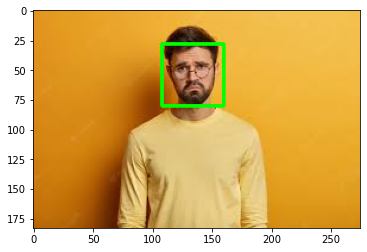

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

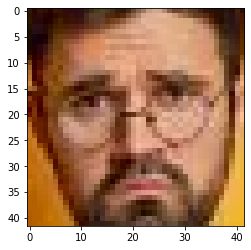

In [14]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [15]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) #need 4th dimension
final_image = final_image/255.0

In [137]:
prediction = new_model.predict(final_image)
index = np.argmax(prediction)

In [138]:
index

3

-----------------------------------------------

### Real Time Demo with Web Cam

In [1]:
import sys
sys.path.append('C:\\users\\yoyoy\\anaconda3\\envs\\rl\\lib\\site-packages')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import h5py

import cv2 
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [6]:
new_model = keras.models.load_model("FER13_Accuracy94.h5")

In [7]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [5]:
path = "haarcascade_forntalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#set rectangle on screen to display status
rectangle_bgr = (255,255,255)
img = np.zeros((500,500)) #make black image
text = "Status"
# get width and height of text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=2)[0]

# set text position
text_offset_x = 10
text_offset_y = img.shape[0]-25

# coordinates of box
box_coords = ((text_offset_x,text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x,text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=2)

# Real Time video starts here
# Open Camera if not open
cap = cv2.VideoCapture(0)
# check if camera is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Camera")
    
while True:
    ret,frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    # print('df')
    # print(len(faces))
    # print(faces)
    if(len(faces) == 0):
        print("Face not detected")
    else:    
        for x,y,w,h in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
            facess = faceCascade.detectMultiScale(roi_gray)
            if len(facess) == 0:
                print("Face not detected")
                
            else:
                for (ex,ey,ew,eh) in facess:
                    face_roi = roi_color[ey:ey+eh, ex:ex+ew]
                    print(roi_color.shape)
                    print(face_roi.shape)
                    
                    final_image = cv2.resize(face_roi, (224,224))
                    final_image = np.expand_dims(final_image, axis = 0) #need 4th dimension
                    final_image = final_image/255.0
                    
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    
                    pred = new_model.predict(final_image)
                    
                    font_scale = 1.5
                    font = cv2.FONT_HERSHEY_PLAIN
        
                    if (np.argmax(pred) == 0):
                        status = "Angry"
                        
                        x1,y1,w1,h1 = 0,0,175,75
                        # Draw black background rectangle
                        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
                        # Add Text
                        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
                        
                        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
                        
                        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
                        
                    elif (np.argmax(pred) == 1):
                        status = "Disgust"
                        
                        x1,y1,w1,h1 = 0,0,175,75
                        # Draw black background rectangle
                        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
                        # Add Text
                        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
                        
                        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
                        
                        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
                        
                    elif (np.argmax(pred) == 2):
                        status = "Fear"
                        
                        x1,y1,w1,h1 = 0,0,175,75
                        # Draw black background rectangle
                        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
                        # Add Text
                        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
                        
                        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
                        
                        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
                        
                    elif (np.argmax(pred) == 3):
                        status = "Happy"
                        
                        x1,y1,w1,h1 = 0,0,175,75
                        # Draw black background rectangle
                        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
                        # Add Text
                        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
                        
                        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
                        
                        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
                        
                    elif (np.argmax(pred) == 4):
                        status = "Neutral"
                        
                        x1,y1,w1,h1 = 0,0,175,75
                        # Draw black background rectangle
                        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
                        # Add Text
                        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
                        
                        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
                        
                        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
                        
                    elif (np.argmax(pred) == 5):
                        status = "Sad"
                        
                        x1,y1,w1,h1 = 0,0,175,75
                        # Draw black background rectangle
                        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
                        # Add Text
                        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
                        
                        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
                        
                        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
                        
                    else:
                        status = "Surprise"
                        
                        x1,y1,w1,h1 = 0,0,175,75
                        # Draw black background rectangle
                        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
                        # Add Text
                        cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
                        
                        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
                        
                        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
                        
                    
        cv2.imshow('Face Emotion Recognition', frame)
                    
        # Handle Exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
                        
        #break

cap.release()
cv2.destroyAllWindows()

(226, 226, 3)
(191, 191, 3)
(229, 229, 3)
(184, 184, 3)
(232, 232, 3)
(190, 190, 3)
(267, 267, 3)
(227, 227, 3)
Face not detected
(265, 265, 3)
(216, 216, 3)
(266, 266, 3)
(219, 219, 3)
Face not detected
(264, 264, 3)
(215, 215, 3)
(257, 257, 3)
(209, 209, 3)
Face not detected
(270, 270, 3)
(214, 214, 3)
Face not detected
(267, 267, 3)
(219, 219, 3)
(248, 248, 3)
(209, 209, 3)
(246, 246, 3)
(207, 207, 3)
Face not detected
(253, 253, 3)
(214, 214, 3)
(257, 257, 3)
(217, 217, 3)
Face not detected
Face not detected
(260, 260, 3)
(217, 217, 3)
(258, 258, 3)
(222, 222, 3)
(260, 260, 3)
(217, 217, 3)
(261, 261, 3)
(219, 219, 3)
Face not detected
(261, 261, 3)
(223, 223, 3)
Face not detected
(261, 261, 3)
(218, 218, 3)
(263, 263, 3)
(222, 222, 3)
(264, 264, 3)
(223, 223, 3)
(264, 264, 3)
(222, 222, 3)
(283, 283, 3)
(243, 243, 3)
(272, 272, 3)
(222, 222, 3)
(276, 276, 3)
(219, 219, 3)
(271, 271, 3)
(221, 221, 3)
(270, 270, 3)
(219, 219, 3)
(269, 269, 3)
(216, 216, 3)
(270, 270, 3)
(222, 222, 3

### Convert the tf model to tensorflow lite to use in Flutter App

In [3]:
import sys
sys.path.append('C:\\users\\yoyoy\\anaconda3\\envs\\rl\\lib\\site-packages')

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import h5py

import cv2 
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
new_model = keras.models.load_model("FER13_Accuracy94.h5")

In [6]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\yoyoy\AppData\Local\Temp\tmpy6_diwqw\assets


In [7]:
# Save the model.
open('FER13.tflite', 'wb').write(tflite_model)

9549948